# **1. Initial Value Problems (I.V.P.)**
## $Euler's$ method for second-order differential equation
$$
\Large{
\left \{
\begin{aligned}
    \frac{d^2\theta}{dt^2} &= -\frac{g}{R}sin\theta\\
    f(t, \theta, \omega) &= -\frac{g}{R}sin\theta\\
    \omega &= \frac{d\theta}{dt}\\
    \frac{d\omega}{dt} &= f(t, \theta, \omega)
\end{aligned}
\right.
}
$$

$$
\Large{
\left \{
\begin{aligned}
    \omega_{k+1} &\approx \omega_k + f(t_k, \theta_k, \omega_k)h\\
    \theta_{k+1} &\approx \theta_k + \omega_k h
\end{aligned}
\right.
}
$$

In [1]:
import numpy as np

def f(t, theta, omega, g=9.81, R=1.):
    return -g / R * np.sin(theta)

def Euler(f, a, b, n, theta0, omega0):
    t = np.linspace(a, b, n); h = t[1] - t[0]
    w = np.empty_like(t); th = np.empty_like(t)
    w[0] = omega0; th[0] = theta0
    for i in range(n-1):
        w[i+1] = w[i] + f(t[i], th[i], w[i]) * h
        th[i+1] = th[i] + w[i] * h
    return t, w, th

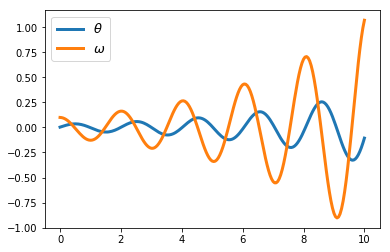

In [3]:
import matplotlib.pyplot as plt

a = 0; b = 10; n = 201; theta0 = np.pi / 1000; omega0 = 0.1
t, w, y = Euler(f, a, b, n, theta0, omega0)

plt.plot(t, y, lw=3, label=r'$\theta$')
plt.plot(t, w, lw=3, label=r'$\omega$')
plt.legend(fontsize=13); plt.show()

$$
\large{
\left \{
\begin{aligned}
    y'' &= 2y'cos t - ysin(4t) -cos(3t)\\
    x &= y'\\
    f(t, x, y) &= 2xcos t - ysin(4t) - cos(3t)\\
    x' &= f(t, x, y)\\
    y_0 &= 1\\
    x_0 &= 1
\end{aligned}
\right.
}
$$

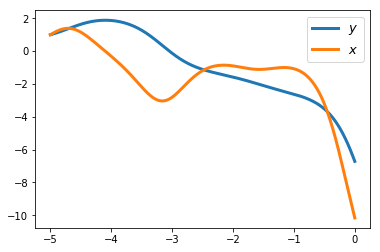

In [4]:
def f2(t, x, y):
    return 2 * x * np.cos(t) - y * np.sin(4*t) - np.cos(3*t)

a = -5; b = 0; n = 1001; y0 = 1; x0 = 1
t, x, y = Euler(f2, a, b, n, y0, x0)

plt.plot(t, y, lw=3, label=r'$y$')
plt.plot(t, x, lw=3, label=r'$x$')
plt.legend(fontsize=13); plt.show()

***
## Fourth-order $Runge-Kutta$ Method
$$
\large{
\left \{
\begin{aligned}
    x' &= g(t, x, y)\\
    &= y\\
    y' &= f(t, x, y)\\
    g_1 &= g(t_k, x_k,y_k), \qquad \qquad \qquad \qquad \qquad \qquad f_1 = f(t_k, x_k, y_k)\\
    g_2 &= y_k + g(t_k+\frac{h}{2}, x_k+\frac{h}{2}g_1, y_k+\frac{h}{2}f_1), \ f_2 = f(t_k+\frac{h}{2}, x_k+\frac{h}{2}g_1, y_k+\frac{h}{2}f_1), \ \\
    g_3 &= y_k + g(t_k+\frac{h}{2}, x_k+\frac{h}{2}g_2, y_k+\frac{h}{2}f_2), \ f_3 = f(t_k+\frac{h}{2}, x_k+\frac{h}{2}g_2, y_k+\frac{h}{2}f_2) \\
    g_4 &= y_k + g(t_k+h, x_k+hg_3, y_k+hf_3), \quad \ \ \  f_4 = f(t_k+h, x_k+fg_3, y_k+hf_3)\\
    y_{k+1} &= \frac{h}{6}(f_1+2f_2+2f_3+f_4), \qquad \qquad \qquad x_{k+1} = \frac{h}{6}(g_1+2g_2+2g_3+g_4)
\end{aligned}
\right.
}
$$

In [19]:
import numpy as np

def dy1(t, x, y):
    return 6*np.cos(t) - x
def dy2(t, x, y):
    return 12 - 3*y

def Runge_Kutta_2(dy, a, b, h, y0, x0):
    t = np.arange(a, b+h, h)
    y = np.empty_like(t); y[0] = y0
    x = np.empty_like(t); x[0] = x0
    for i in range(len(t)-1):
        yy = y[i] + h*.5*dy(t[i], x[i], y[i])
        xx = x[i] + h*.5*y[i]
        y[i+1] = y[i] + h*dy(t[i]+.5*h, xx, yy)
        x[i+1] = x[i] + h*yy
    return t, y, x

def Runge_Kutta_4(dy, a, b, h, y0, x0):
    t = np.arange(a, b+h, h)
    y = np.empty_like(t); x = np.empty_like(t)
    y[0] = y0; x[0] = x0
    for i in range(len(t)-1):
        g1 = y[i];           f1 = dy(t[i], x[i], g1)
        g2 = y[i] + f1*.5*h; f2 = dy(t[i]+.5*h, x[i]+.5*g1*h, g2)
        g3 = y[i] + f2*.5*h; f3 = dy(t[i]+.5*h, x[i]+.5*g2*h, g3)
        g4 = y[i] + f3*h;    f4 = dy(t[i+1], x[i]+g3*h, g4)
#         if i < 1:
#             for j in range(4):
#                 print('g_%d &= %.7f, f_%d = %.7f\\\\'%(j+1, eval('g'+str(j+1)),(j+1), eval('f'+str(j+1))))
        y[i+1] = y[i] + h * (f1 + 2*(f2+f3) + f4) / 6
        x[i+1] = x[i] + h * (g1 + 2*(g2+g3) + g4) / 6
    return t, y, x

def plot_com(t, sol, es, title=''):
    font = {'family': 'Times New Roman'}
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(t, sol[0], lw=4, c='r', label='Numerical y')
    plt.plot(t, sol[1], lw=4, c='g', label='Numerical x')
    plt.plot(t, es[0], lw=2, c='b', label='Analytical y')
    plt.plot(t, es[1], lw=2, c='k', label='Analytical x')
    plt.xlabel('t', fontsize=14); plt.ylabel('y', fontsize=14)
    plt.xticks(fontsize=13); plt.yticks(fontsize=13)
    plt.grid(); plt.legend(fontsize=14)
    plt.subplot(122)
    plt.semilogy(t, abs(sol[0]-es[0]), lw=2, label='Error: y')
    plt.semilogy(t, abs(sol[1]-es[1]), lw=2, label='Error: x')
    plt.xlabel('t', fontsize=14); plt.ylabel('error', fontsize=14)
    plt.xticks(fontsize=13); plt.yticks(fontsize=13)
    plt.suptitle(title, fontdict=font, fontsize=20); plt.legend(fontsize=14)
    plt.grid(); plt.show()

[2.         2.1549349  2.31945859 2.49310368 2.6753427  2.86558963
 3.06320171 3.26748146 3.47767892 3.69299415 3.9125799  4.13554449
 4.36095491 4.5878401  4.81519435 5.04198098 5.26713604 5.48957225
 5.70818301 5.92184655 6.12943017 6.32979456 6.52179822 6.7043019
 6.87617306 7.03629048 7.1835487  7.31686261 7.4351719  7.53744558
 7.62268636 7.68993501 7.73827462 7.76683477 7.77479557 7.76139156
 7.72591554 7.66772214 7.5862313  7.48093152 7.35138291] 

 [ 3.          3.19604248  3.38334715  3.56069834  3.72690899  3.88082552
  4.02133249  4.14735728  4.2578745   4.35191042  4.42854706  4.48692626
  4.52625344  4.54580123  4.54491288  4.52300538  4.47957239  4.41418696
  4.32650384  4.21626171  4.08328498  3.92748536  3.74886314  3.54750818
  3.32360055  3.07741088  2.80930046  2.51972089  2.20921359  1.87840881
  1.52802451  1.15886475  0.77181792  0.36785459 -0.05197492 -0.4865433
 -0.93464921 -1.39502061 -1.86631831 -2.34713977 -2.83602319]


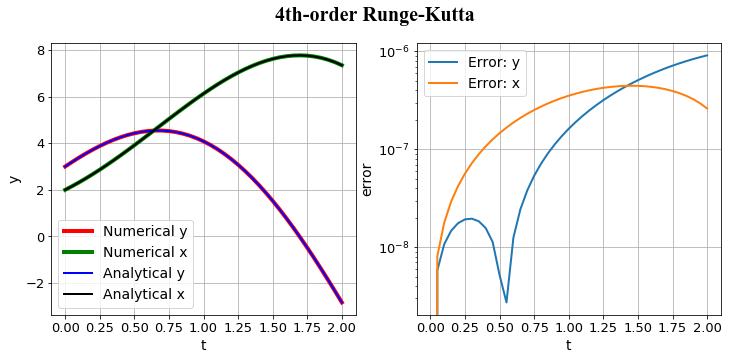

In [6]:
a=0; b = 2; x0 = 2; y0 = 3; h = 0.05
t, y, x = Runge_Kutta_4(dy1, a, b, h, y0, x0)
print(x, '\n\n', y)
ex = 2*np.cos(t) + 3*np.sin(t) + 3*t*np.sin(t)
ey = -2*np.sin(t) + 3*np.cos(t) + 3*np.sin(t) + 3*t*np.cos(t)
es = [ey, ex]; sol = [y, x]
plot_com(t, sol, es, title='4th-order Runge-Kutta')

[2.         2.155      2.31960469 2.4933461  2.67569607 2.86606778
 3.06381759 3.26824701 3.47860503 3.6940905  3.91385493 4.13700529
 4.36260718 4.58968804 4.81724067 5.04422677 5.2695808  5.4922138
 5.71101749 5.9248684  6.1326321  6.33316759 6.52533164 6.70798331
 6.8799884  7.04022404 7.1875832  7.3209792  7.43935027 7.541664
 7.62692176 7.69416307 7.74246986 7.77097063 7.77884453 7.76532529
 7.72970496 7.67133758 7.58964261 7.48410823 7.35429434] 

 [ 3.          3.19615625  3.3835677   3.56101731  3.7273167   3.88131098
  4.02188351  4.14796049  4.25851548  4.3525737   4.42921628  4.48758419
  4.52688214  4.54638211  4.54542682  4.52343283  4.47989351  4.41438169
  4.32655208  4.2161434   4.08298021  3.92697455  3.74812712  3.54652834
  3.32235893  3.07589036  2.8074848   2.51759492  2.20676328  1.87562142
  1.52488865  1.15537055  0.76795709  0.36362051 -0.05658711 -0.49153658
 -0.94002466 -1.4007773  -1.87245326 -2.3536479  -2.84289727]


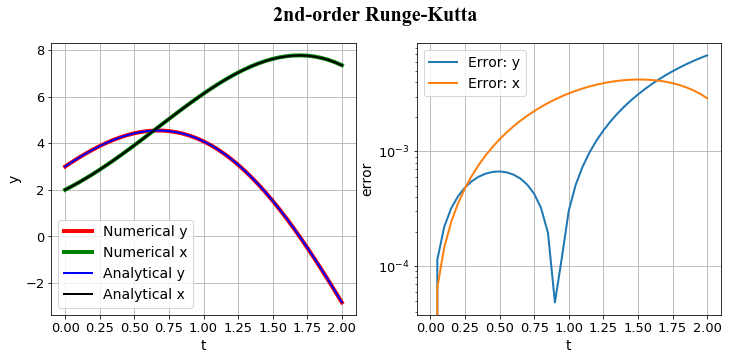

In [7]:
a=0; b = 2; x0 = 2; y0 = 3
t, y, x = Runge_Kutta_2(dy1, a, b, h, y0, x0)
print(x, '\n\n', y)
ex = 2*np.cos(t) + 3*np.sin(t) + 3*t*np.sin(t)
ey = -2*np.sin(t) + 3*np.cos(t) + 3*np.sin(t) + 3*t*np.cos(t)
es = [ey, ex]; sol = [y, x]
plot_com(t, sol, es, title='2nd-order Runge-Kutta')

[ 5.          5.06070859  5.14081928  5.23762952  5.34881321  5.47236825
  5.60657141  5.74993951  5.90119594  6.05924193  6.22313176  6.39205142
  6.56530031  6.7422754   6.92245766  7.10540036  7.29071899  7.47808262
  7.66720638  7.85784511  8.04978778  8.24285277  8.43688375  8.63174616
  8.82732419  9.02351817  9.22024229  9.41742271  9.61499588  9.81290708
 10.01110924 10.20956181 10.40822994 10.60708358 10.8060969  11.00524765
 11.2045167  11.40388756 11.60334606 11.80287998 12.00247882] 

 [1.         1.41787422 1.77754215 2.08711143 2.35356037 2.58289526
 2.78028577 2.95018148 3.09641218 3.2222742  3.33060472 3.42384573
 3.50409907 3.57317381 3.63262703 3.68379892 3.72784302 3.76575215
 3.79838086 3.82646467 3.85063665 3.87144168 3.88934875 3.90476152
 3.91802742 3.9294455  3.93927313 3.94773186 3.95501237 3.96127876
 3.96667229 3.97131456 3.97531019 3.97874927 3.98170931 3.98425705
 3.98644991 3.98833732 3.98996183 3.99136006 3.99256353]


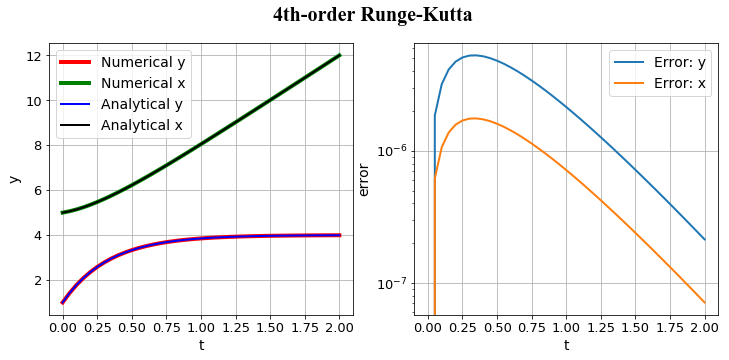

In [8]:
a=0; b = 2; x0 = 5; y0 = 1
t, y, x = Runge_Kutta_4(dy2, a, b, h, y0, x0)
print(x, '\n\n', y)
ex = 4 + 4*t + np.exp(-3*t)
ey = 4 - 3*np.exp(-3*t)
es = [ey, ex]; sol = [y, x]
plot_com(t, sol, es, title='4th-order Runge-Kutta')

[ 5.          5.06070859  5.14081928  5.23762952  5.34881321  5.47236825
  5.60657141  5.74993951  5.90119594  6.05924193  6.22313176  6.39205142
  6.56530031  6.7422754   6.92245766  7.10540036  7.29071899  7.47808262
  7.66720638  7.85784511  8.04978778  8.24285277  8.43688375  8.63174616
  8.82732419  9.02351817  9.22024229  9.41742271  9.61499588  9.81290708
 10.01110924 10.20956181 10.40822994 10.60708358 10.8060969  11.00524765
 11.2045167  11.40388756 11.60334606 11.80287998 12.00247882] 

 [1.         1.41787422 1.77754215 2.08711143 2.35356037 2.58289526
 2.78028577 2.95018148 3.09641218 3.2222742  3.33060472 3.42384573
 3.50409907 3.57317381 3.63262703 3.68379892 3.72784302 3.76575215
 3.79838086 3.82646467 3.85063665 3.87144168 3.88934875 3.90476152
 3.91802742 3.9294455  3.93927313 3.94773186 3.95501237 3.96127876
 3.96667229 3.97131456 3.97531019 3.97874927 3.98170931 3.98425705
 3.98644991 3.98833732 3.98996183 3.99136006 3.99256353]


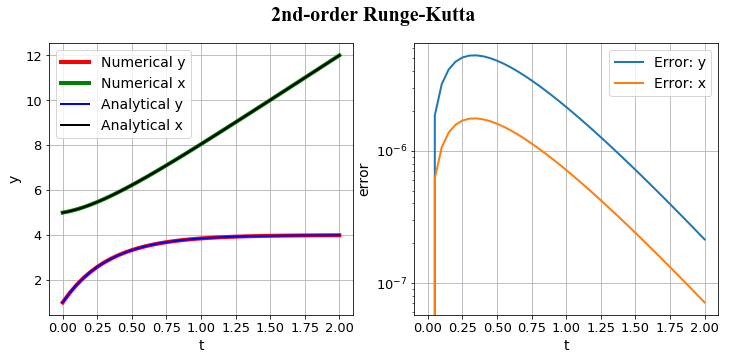

In [9]:
a=0; b = 2; x0 = 5; y0 = 1
t, y, x = Runge_Kutta_4(dy2, a, b, h, y0, x0)
print(x, '\n\n', y)
ex = 4 + 4*t + np.exp(-3*t)
ey = 4 - 3*np.exp(-3*t)
es = [ey, ex]; sol = [y, x]
plot_com(t, sol, es, title='2nd-order Runge-Kutta')

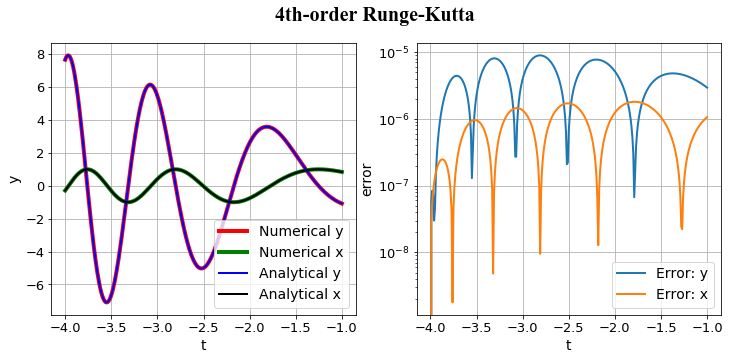

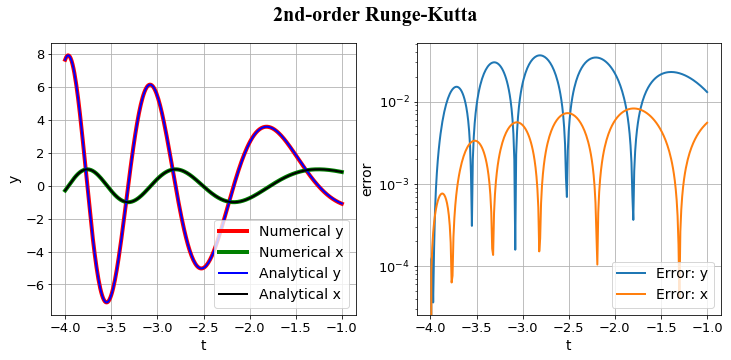

In [15]:
def dy3(t, x, y):
    return y / t - 4*t**2*x
def es_y(t):
    return 2*t*np.cos(t**2)
def es_x(t):
    return np.sin(t**2)

a = -4; b = -1; x0 = np.sin(a**2); y0 = 2*a*np.cos(a**2); h = 1e-2
t, y, x = Runge_Kutta_4(dy3, a, b, h, y0, x0)
ex = es_x(t); ey = es_y(t)
sol = [y, x]; es = [ey, ex]
plot_com(t, sol, es, title='4th-order Runge-Kutta')
t, y, x = Runge_Kutta_2(dy3, a, b, h, y0, x0)
ex = es_x(t); ey = es_y(t)
sol = [y, x]; es = [ey, ex]
plot_com(t, sol, es, title='2nd-order Runge-Kutta')

# **2. Boundary Value Problems (B.V.P.)**
## 1. linear shooting method for 2nd-order linear ODE
$$
\large{
    y''=f(t, y, y') \text{ with } y(a)=\alpha \text{ and } y(b)=\beta \tag{2.1}.
}
$$
##### For linear equation
$$
\large{
    y''(t)=p(t)y'(t)+q(t)y(t)+r(t) \tag{2.2},
}
$$
##### let $\large{y_1(t)}$ be the solution of
$$
\large{
    y''(t)=p(t)y'(t)+q(t)y(t) \text{ with } y_1(a)=\alpha \text{ and } y_1'(0)=0 \tag{2.3}.
}
$$
##### Again, let $\large{y_2(t)}$ be the solution of
$$
\large{
    y''(t)=p(t)y'(t)+q(t)y(t) \text{ with }  y_2(a)=0 \text{ and }  y_2'(a)=1 \tag{2.4}.
}
$$
##### The linear combination $\large{y_1(t)+Cy_2(t)}$ is the solution to $eq. \ (2.2)$.
##### Using
$$
\large{
\left \{
\begin{aligned}
    y(a) &= y_1(a) + Cy_2(a)=\alpha\\
    y(b) &= y_1(b) + Cy_2(b)=\beta
\end{aligned}
\right. \tag{2.5}
}
$$
##### to find $\large{C}$
$$
\large{
    C=\frac{\beta-y_1(b)}{y_2(b)} \tag{2.6},
}
$$
##### so the solution to $eq. \ (2.2)$ is given by
$$
\large{
    y(t) = y_1(t) + \frac{\beta-y_1(b)}{y_2(b)}y_2(t) \tag{2.7}.
}
$$

##### An example
$$
\large{
    y''(t)=\frac{2t}{1+t^2}y'(t)-\frac{2}{1+t^2}y(t)+1 \text{ with } y(0)=1.25 \text{ and } y(4)=-0.95 \text{ over } [0, 4].
}
$$

In [100]:
import numpy as np

def Runge_Kutta_4(dy, a, b, h, y0, x0):
    t = np.arange(a, b+h, h)
    y = np.empty_like(t); x = np.empty_like(t)
    y[0] = y0; x[0] = x0
    for i in range(len(t)-1):
        g1 = y[i];           f1 = dy(t[i], x[i], g1)
        g2 = y[i] + f1*.5*h; f2 = dy(t[i]+.5*h, x[i]+.5*g1*h, g2)
        g3 = y[i] + f2*.5*h; f3 = dy(t[i]+.5*h, x[i]+.5*g2*h, g3)
        g4 = y[i] + f3*h;    f4 = dy(t[i+1], x[i]+g3*h, g4)
        y[i+1] = y[i] + h * (f1 + 2*(f2+f3) + f4) / 6
        x[i+1] = x[i] + h * (g1 + 2*(g2+g3) + g4) / 6
    return t, x

def rk4_lin_shoot(func1, func2, a, b, h, xa, xb):
    t, x1 = Runge_Kutta_4(func1, a, b, h, 0, xa)
    _, x2 = Runge_Kutta_4(func2, a, b, h, 1, 0)
    return t, x1 + (xb-x1[-1])/x2[-1]*x2

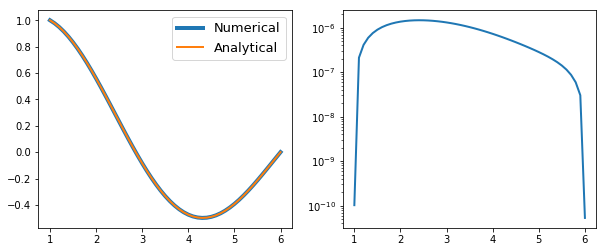

In [101]:
def ex3(t):
    return (0.2913843206*np.cos(t)+1.001299385*np.sin(t)) / t**.5

def f3(t, x, y):
     return -1/t*y - (1-1/(4*t**2))*x
    
h = 0.1; a = 1; b = 6; xa = 1; xb = 0
t, x1 = Runge_Kutta_4(f3, a, b, h, 0, xa)
_, x2 = Runge_Kutta_4(f3, a, b, h, 1, 0)
C = (xb-x1[-1]) / x2[-1]
x = x1 + C*x2
ex = ex3(t)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, x, lw=4, label='Numerical')
plt.plot(t, ex, lw=2, label='Analytical')
plt.legend(fontsize=13)
plt.subplot(122)
plt.semilogy(t, abs(ex-x), lw=2)
plt.show()

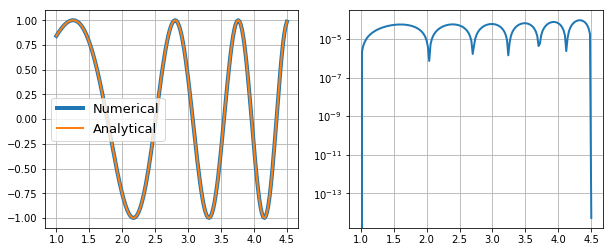

In [102]:
def ex5(t):
    return np.sin(t**2)

def f5(t, x, y):
     return y/t - 4*t**2*x
    
h = 0.02; a = 1; b = 4.5; xa = ex5(a); xb = ex5(b)
t, x1 = Runge_Kutta_4(f5, a, b, h, 0, xa)
_, x2 = Runge_Kutta_4(f5, a, b, h, 1, 0)
C = (xb-x1[-1]) / x2[-1]
x = x1 + C*x2
ex = ex5(t)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t, x, lw=4, label='Numerical')
plt.plot(t, ex, lw=2, label='Analytical')
plt.grid(); plt.legend(fontsize=13)
plt.subplot(122)
plt.semilogy(t, abs(ex-x), lw=2)
plt.grid(); plt.show()

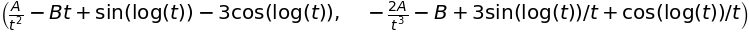

In [59]:
import sympy
from sympy import *

sympy.init_printing()
A = Symbol('A')
B = Symbol('B')
t = Symbol('t')
f = A / t**2 - B*t - 3*cos(ln(t)) + sin(ln(t))
d1 = diff(f, t)
d2 = diff(d1, t)
dd = -2/t*d1 + 2/t**2*f + 10*cos(ln(t))/t**2
f, d1

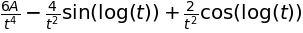

In [50]:
d2

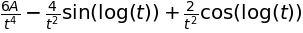

In [52]:
expand(dd)

## 2. Finite difference method
##### For 2nd-order linear ODE
$$
\large{
    x''(t)=p(t)x'(t)+q(t)x(t)+r(t) \tag{2.1},
}
$$
##### we discretize $eq. \ (2.1)$ with $\text{finite difference method}$
$$
\large{
\left \{
\begin{aligned}
    x''_i &= \frac{x_{i+1}-2x_i+x_{i-1}}{h^2}\\
    x'_i &= \frac{x_{i+1}-x_{i-1}}{2h}\\
    \frac{x_{i+1}-2x_i+x_{i-1}}{h^2} &= p_i\frac{x_{i+1}-x_{i-1}}{2h}x_i+q_ix_i+r_i
\end{aligned}
\right. \tag{2.2}.
}
$$
##### We multiply $h^2$ on each size of $eq. \ (2.3)$ and collecting the three terms $x_{i-1}, x_i$ and $x_{i+1}$
$$
\large{
    (-\frac{h}{2}p_i-1)x_{i-1}+(2+h^2q_i)x_i+(\frac{h}{2}p_i-1)x_{i+1}=-h^2r_i \tag{2.3}.
}
$$
##### Here, we give an example,
$$
\large{
\begin{aligned}
    x''(t)&=\frac{2t}{1+t^2}x'(t)-\frac{2}{1+t^2}x(t)+1\\
    & \text{ with } x(0)=1.25 \text{ and } x(4)=-0.95 , j=1,2,\cdots,N-1
\end{aligned}\tag{2.4}.
}
$$
##### In matrix form,
$$
\normalsize{
\left [
\begin{matrix}
    2+h^2q_1          & \frac{h}{2}p_1-1 &    0    &    0    & 0\\
    -\frac{h}{2}p_2-1 & 2+h^2q_2         &  \frac{h}{2}p_2-1 &  0   & 0\\
    0                 &-\frac{h}{2}p_j-1 & 2+h^2q_j              & \frac{h}{2}p_j-1 & 0\\
    0     &     0   & -\frac{h}{2}p_{N-2}-1 & 2+h^2q_{N-2}          & \frac{h}{2}p_{N-2}-1 \\
    0          &  0               &    0 & -\frac{h}{2}p_{N-1}-1 & 2+h^2q_{N-1}
\end{matrix}
\right ]
\\
\left [
\begin{matrix}
    x_1\\
    x_2\\
    x_j\\
    x_{N-2}\\
    x_{N-1}
\end{matrix}
\right ] =
\left [
\begin{matrix}
    -h^2r_1+e_0\\
    -h^2r_2\\
    -h^2r_j\\
    -h^2r_{N-2}\\
    -h^2r_{N-1}+e_N
\end{matrix}
\right ]\tag{2.5},
}
$$
##### where, $\large{e_0=(\frac{h}{2}p_1+1})\alpha, \ e_N=(\frac{-h}{2}p_{N-1}+1)\beta$ and $\large{\alpha=x_0=x(a), \ \beta=x_N=x(b)}$.

In [90]:
import numpy as np

def fd_ode(a, b, h, p, q, r, xa, xb):
    t = np.arange(a, b+h, h); n = len(t) - 1
    x = np.empty_like(t); x[0] = xa; x[-1] = xb
    e0 = (h/2*p(t[1])+1)*xa; en = (-h/2*p(t[n-1])+1)*xb
    A = np.zeros((n-1, n-1)); B = np.zeros(n-1)
    A[0, 0] = 2+h**2*q(t[1]); A[0, 1] = h/2*p(t[1])-1
    A[n-2, n-3] = -h/2*p(t[n-1])-1; A[n-2, n-2] = 2+h**2*q(t[n-1])
    B[0] = -h**2*r(t[1])+e0; B[n-2] = -h**2*r(t[n-1])+en
    for i in range(1, n-2):
        A[i, i-1] = -h/2*p(t[i+1])-1; A[i, i] = 2+h**2*q(t[i+1])
        A[i, i+1] = h/2*p(t[i+1])-1; B[i] = -h**2*r(t[i+1])
    xx = np.linalg.solve(A, B); x[1: n] = xx
    return t, x

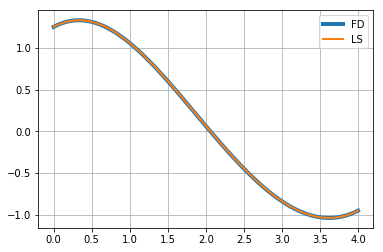

In [103]:
import matplotlib.pyplot as plt

p = lambda t: 2*t / (1+t**2)
q = lambda t: -2 / (1+t**2)
r = lambda t: 1
def func1(t, x, y):
    return 2*t/(1+t**2)*y - 2/(1+t**2)*x + 1
def func2(t, x, y):
    return 2*t/(1+t**2)*y - 2/(1+t**2)*x

a = 0; b = 4; h = 0.05; xa = 1.25; xb = -0.95
t, x1 = fd_ode(a, b, h, p, q, r, xa, xb)
_, x2 = rk4_lin_shoot(func1, func2, a, b, h, xa, xb)
plt.plot(t, x1, lw=4, label='FD')
plt.plot(t, x2, lw=2, label='LS')
plt.grid(); plt.legend(); plt.show()